# 用 Python 学习数字图像处理
## 2. 图像像素的访问与裁剪
参考：[python数字图像处理（3）：图像像素的访问与裁剪](http://www.cnblogs.com/denny402/p/5122112.html)

图片读入程序中后，是以 numpy 数组存在的。因此对 NumPy 数组的一切功能，对图片也适用。对数组元素的访问，实际上就是对图像像素点的访问。

彩色图像的访问方式：`img[i, j, c]`  
`i` 表示图像的行数，`j` 表示图像的列数，`c` 表示图像的通道数（R、G、B 三个通道分别对应 0、1、2。坐标从图像的左上角开始，起始坐标为 0。

灰度图像的访问方式为：`gray_img[i, j]`

In [1]:
from skimage import io, data, color
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

**例1：**输出小猫照片 G 通道中的第 20 行 30 列的像素值

In [2]:
img = data.chelsea()
pixel = img[20, 30, 1]
print(pixel)

129


**例2：**显示红色单通道图片

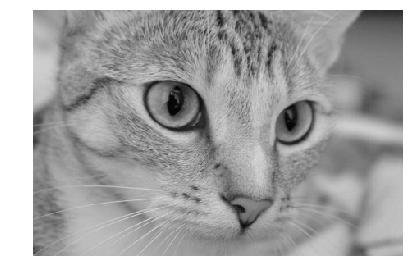

In [3]:
r_img = img[:, :, 0]
io.imshow(r_img)
plt.axis("off")  # 关闭坐标显示
io.show()

**例3：**对小猫图片随机添加椒盐噪声

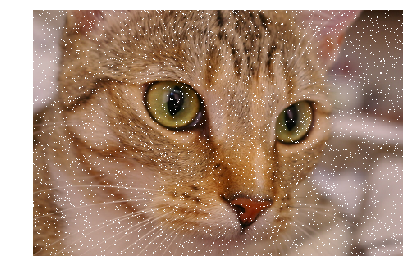

In [4]:
# 复制 img 给 img_salt_and_pepper，用于添加椒盐噪声
# img_salt_and_pepper = img  # 浅拷贝，所以并没有什么用

# 随机生成 5000 个像素点的椒盐
rows, cols, dims = img.shape
for i in range(5000):
    row = np.random.randint(0, rows)
    col = np.random.randint(0, cols)
    img[row, col, :] = 255
    
io.imshow(img)
plt.axis("off")  # 关闭坐标显示
io.show()

**例4：**裁剪图像。通过对 NumPy 数组的裁剪，可以实现对图像的裁剪。

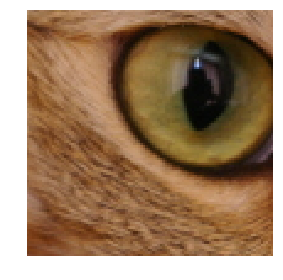

In [5]:
# 重新读取小猫的图片
img = data.chelsea()

# 选取一个感兴趣的区域（roi, region of interest）
roi = img[80:180, 100:200, :]
io.imshow(roi)
plt.axis("off")  # 关闭坐标显示
io.show()

**例5：**将小猫的灰度图像进行二值化，像素大于等于 128 的变为 1，否则变为 0。

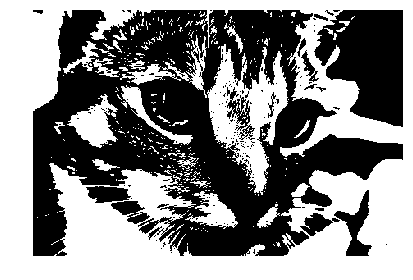

In [6]:
# 将彩色图像转换为灰度图像，像素范围会从 int 型 0-255 变为 float64 型 0-1
img_gray = color.rgb2gray(img)
# 获取图像的高度和宽度
height, width = img_gray.shape

# 二值化，大于等于 0.5 的像素值置为 1；否则置为 0
for i in range(height):
    for j in range(width):
        if (img_gray[i, j] >= 0.5):
            img_gray[i, j] = 1
        else:
            img_gray[i, j] = 0

io.imshow(img_gray)
plt.axis("off")
io.show()

**例6：**根据小猫彩色图像的 R 通道的值进行色彩变换

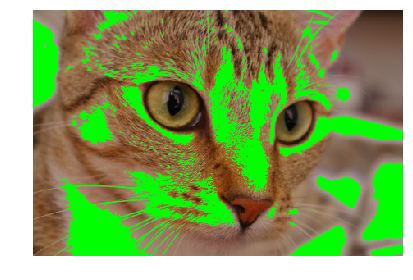

In [7]:
# 重新读取小猫图像
img = data.chelsea()
# 获取 R 通道中像素值大于等于 128 的索引
red_channel_indices = img[:, :, 0] > 170
# 将满足索引要求的像素值置为 [0, 255, 0]
img[red_channel_indices] = [0, 255, 0]
io.imshow(img)
plt.axis("off")
io.show()